In [2]:
import matplotlib.pyplot as plt
import numpy as np

import os
import PIL

In [3]:
import cv2

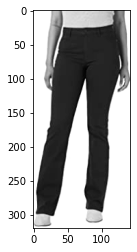

In [4]:
DATADIR = "Images"

CATEGORIES = ["Jeans", "sarees", "tops"]

for category in CATEGORIES:
    path = os.path.join(DATADIR,category)  # create path to jeans, saree and top
    for img in os.listdir(path):  # iterate over each image per jeans, saree, top
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray') #graph it
        plt.show()  # display!

        break
    break

In [5]:
import pathlib
data_dir = pathlib.Path(DATADIR)
data_dir

WindowsPath('Images')

In [6]:
list(data_dir.glob('*/*.jpg'))[:3]

[WindowsPath('Images/Jeans/41cbj-BkN5S._AC_UL320_.jpg'),
 WindowsPath('Images/Jeans/41r5iGw7i5L._AC_UL320_.jpg'),
 WindowsPath('Images/Jeans/41uEfX8LQ5L._AC_UL320_.jpg')]

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

928


In [8]:
jeans = list(data_dir.glob('jeans/*'))
jeans[:5]

[WindowsPath('Images/jeans/41cbj-BkN5S._AC_UL320_.jpg'),
 WindowsPath('Images/jeans/41r5iGw7i5L._AC_UL320_.jpg'),
 WindowsPath('Images/jeans/41uEfX8LQ5L._AC_UL320_.jpg'),
 WindowsPath('Images/jeans/51+kqgyj6tL._AC_UL320_.jpg'),
 WindowsPath('Images/jeans/510K+gY1X5L._AC_UL320_.jpg')]

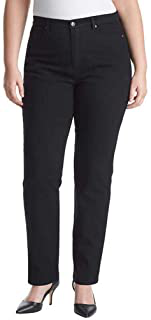

In [9]:
PIL.Image.open(str(jeans[1]))

In [15]:
saree = list(data_dir.glob('sarees/*'))

In [16]:
top = list(data_dir.glob('tops/*'))

In [17]:
clothes_images_dict = {
    'jeans': list(data_dir.glob('jeans/*')),
    'saree': list(data_dir.glob('saree/*')),
    'trouser': list(data_dir.glob('trouser/*')),
}

In [18]:
clothes_labels_dict = {
    'jeans': 0,
    'saree': 1,
    'top': 2,
}

In [19]:
img = cv2.imread(str(clothes_images_dict['jeans'][0]))

In [20]:
img.shape

(320, 143, 3)

In [21]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [22]:
X, y = [], []

for clothe_name, images in clothes_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(clothes_labels_dict[clothe_name])

In [23]:
X = np.array(X)
y = np.array(y)

In [24]:
# Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [25]:
# Data Preprocessing

X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [26]:
!pip install keras

In [28]:
!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=1f7d24f6fe38db38bfdf65a9c9259d19ae9c4477825dadc297181b996dc3cbfb
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 2.0.0
    Uninstalling importlib-metadata-2.0.0:
      Successfully uninstalled importlib-metadata-2.0.0


In [29]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [30]:
# Model Building

num_classes = 3

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
7/7 [==============================] - 13s 881ms/step - loss: 0.1765 - accuracy: 0.8889
Epoch 2/30
7/7 [==============================] - 6s 897ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/30
7/7 [==============================] - 6s 912ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/30
7/7 [==============================] - 6s 821ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/30
7/7 [==============================] - 6s 907ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/30
7/7 [==============================] - 6s 866ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/30
7/7 [==============================] - 6s 909ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/30
7/7 [==============================] - 6s 904ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/30
7/7 [==============================] - 6s 839ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/30
7/7 [==============================] - 6s 913ms/step - loss: 0.0000e+00 -

In [31]:
model.evaluate(X_test_scaled,y_test)

3/3 [==============================] - 1s 180ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [32]:
prediction=model.predict(X_test_scaled)
prediction

array([[101.21743 , -47.5723  , -35.989517],
       [103.552345, -48.721252, -36.855896],
       [ 89.22139 , -41.695297, -31.592062],
       [ 94.11061 , -44.317062, -33.608646],
       [102.56669 , -48.212658, -36.570393],
       [103.08653 , -48.55332 , -36.688835],
       [119.95858 , -56.472725, -42.720985],
       [ 94.8936  , -44.589283, -33.831367],
       [ 99.06956 , -46.71984 , -35.126656],
       [ 93.298325, -43.7643  , -33.14466 ],
       [108.25357 , -50.829025, -38.45745 ],
       [101.71524 , -47.967808, -36.21989 ],
       [105.7914  , -49.736065, -37.631493],
       [104.50066 , -49.33941 , -37.174644],
       [111.89897 , -52.716354, -39.846184],
       [110.573204, -52.125427, -39.378723],
       [ 96.23168 , -45.4025  , -34.184822],
       [ 62.23337 , -29.189356, -22.128923],
       [106.331   , -49.999886, -37.943836],
       [ 95.74149 , -44.88542 , -34.06981 ],
       [ 96.484856, -45.36986 , -34.45285 ],
       [104.35848 , -49.230347, -37.397945],
       [10

In [34]:
y_pred_classes = [np.argmax(element) for element in prediction]
y_pred_classes

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [35]:
from sklearn.metrics import classification_report,confusion_matrix
print('----------------------Classification_report--------------------------\n',classification_report(y_test,y_pred_classes))

----------------------Classification_report--------------------------
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        67

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

